In [ ]:
!pip install mlxtend

In [ ]:
import pandas as pd

df = pd.read_csv('/Customer Preference Survey (Responses) - Form Responses 1 (1).csv')

In [ ]:
df.head(5)

,Timestamp,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
0,10/17/2021 17:29:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/17/2021 17:43:38,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
2,10/17/2021 17:43:41,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,10/17/2021 17:43:46,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,เคย,ไม่เคย,เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ
4,10/17/2021 17:43:49,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


In [ ]:
df = df.replace("ไม่เคยซื้อ",0)
df = df.replace("ไม่เคย",0)
df = df.replace("ไม่เคยซือ",0)
df = df.replace("ไม่",0)
df = df.replace("เคย",1)
df = df.replace("เคยซื้อ",1)
df = df.fillna(0)
df['Transaction'] = df.index+1
df = df.drop(columns="Timestamp")
df

,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด,Transaction
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5
5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,6
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,7
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,8
8,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,9
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,10


In [ ]:
df.head(5)

,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด,Transaction
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5


In [ ]:
missing = df.isnull().sum()
print(missing)

playstation5                     0
เครื่องทำขนมปัง                  0
Ergonomic Wrist Rest             0
เครื่องอบผ้า                     0
เครื่องชงกาแฟแคปซูล              0
เก้าอี้ LA-Z-Boy                 0
เครื่องให้อาหารสัตว์อัตโนมัติ    0
บัตตาเลี่ยน                      0
แก้วเก็บความเย็น                 0
ลู่วิ่งออกกำลังกาย               0
Kindle                           0
เครื่องซักผ้า                    0
Bluetooth Speaker                0
ห้องน้ำแมวอัตโนมัติ              0
PS5                              0
ทรายแมว                          0
ลำโพง pixel                      0
Logitech Mx Master 3 Mouse       0
ตุ๊กตา ty                        0
น้ำพุแมว                         0
Robot ดูดฝุ่น                    0
Mechanical keyboard              0
Nintendo switch                  0
หนังสือ python                   0
gaming chair                     0
Deskmat                          0
Dew - ไฟโรเซ่                    0
เทียนหอม jo malone               0
กระติกน้ำ 2 ลิตร    

In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
hot_encoded_df = df.applymap(encode_units)

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(hot_encoded_df, min_support=0.2, use_colnames=True)

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(เครื่องชงกาแฟแคปซูล),(แก้วเก็บความเย็น),0.340426,0.702128,0.297872,0.875000,1.246212,0.058850,2.382979
1,(แก้วเก็บความเย็น),(เครื่องชงกาแฟแคปซูล),0.702128,0.340426,0.297872,0.424242,1.246212,0.058850,1.145577
2,(เครื่องซักผ้า),(เครื่องชงกาแฟแคปซูล),0.510638,0.340426,0.212766,0.416667,1.223958,0.038932,1.130699
3,(เครื่องชงกาแฟแคปซูล),(เครื่องซักผ้า),0.340426,0.510638,0.212766,0.625000,1.223958,0.038932,1.304965
4,(เครื่องชงกาแฟแคปซูล),(Bluetooth Speaker),0.340426,0.723404,0.297872,0.875000,1.209559,0.051607,2.212766
5,(Bluetooth Speaker),(เครื่องชงกาแฟแคปซูล),0.723404,0.340426,0.297872,0.411765,1.209559,0.051607,1.121277
6,(พลาสเตอร์บรรเทาปวด ตราเสือ),(เครื่องชงกาแฟแคปซูล),0.553191,0.340426,0.234043,0.423077,1.242788,0.045722,1.143262
7,(เครื่องชงกาแฟแคปซูล),(พลาสเตอร์บรรเทาปวด ตราเสือ),0.340426,0.553191,0.234043,0.687500,1.242788,0.045722,1.429787
8,(ขนมจีนน้ำยาปู),(เครื่องชงกาแฟแคปซูล),0.617021,0.340426,0.212766,0.344828,1.012931,0.002716,1.006719
9,(เครื่องชงกาแฟแคปซูล),(ขนมจีนน้ำยาปู),0.340426,0.617021,0.212766,0.625000,1.012931,0.002716,1.021277


In [ ]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.5)&(rules['support'] >= 0.5) ].sort_values(by=['lift','confidence'])

rules.head(50)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(เครื่องชงกาแฟแคปซูล),(แก้วเก็บความเย็น),0.340426,0.702128,0.297872,0.875000,1.246212,0.058850,2.382979
1,(แก้วเก็บความเย็น),(เครื่องชงกาแฟแคปซูล),0.702128,0.340426,0.297872,0.424242,1.246212,0.058850,1.145577
2,(เครื่องซักผ้า),(เครื่องชงกาแฟแคปซูล),0.510638,0.340426,0.212766,0.416667,1.223958,0.038932,1.130699
3,(เครื่องชงกาแฟแคปซูล),(เครื่องซักผ้า),0.340426,0.510638,0.212766,0.625000,1.223958,0.038932,1.304965
4,(เครื่องชงกาแฟแคปซูล),(Bluetooth Speaker),0.340426,0.723404,0.297872,0.875000,1.209559,0.051607,2.212766
5,(Bluetooth Speaker),(เครื่องชงกาแฟแคปซูล),0.723404,0.340426,0.297872,0.411765,1.209559,0.051607,1.121277
6,(พลาสเตอร์บรรเทาปวด ตราเสือ),(เครื่องชงกาแฟแคปซูล),0.553191,0.340426,0.234043,0.423077,1.242788,0.045722,1.143262
7,(เครื่องชงกาแฟแคปซูล),(พลาสเตอร์บรรเทาปวด ตราเสือ),0.340426,0.553191,0.234043,0.687500,1.242788,0.045722,1.429787
8,(ขนมจีนน้ำยาปู),(เครื่องชงกาแฟแคปซูล),0.617021,0.340426,0.212766,0.344828,1.012931,0.002716,1.006719
9,(เครื่องชงกาแฟแคปซูล),(ขนมจีนน้ำยาปู),0.340426,0.617021,0.212766,0.625000,1.012931,0.002716,1.021277


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3639 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3656 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3629 missing from current font.
  font.set_text(s

**สรุปการทำ Product Recommendation**


1.   เครื่องชงกาแฟแคปซูล **และ** แก้วเก็บความเย็น
2.   เครื่องชงกาแฟแคปซูล **และ**	เครื่องซักผ้า 
3.   Bluetooth Speaker	**และ** เครื่องชงกาแฟแคปซูล	
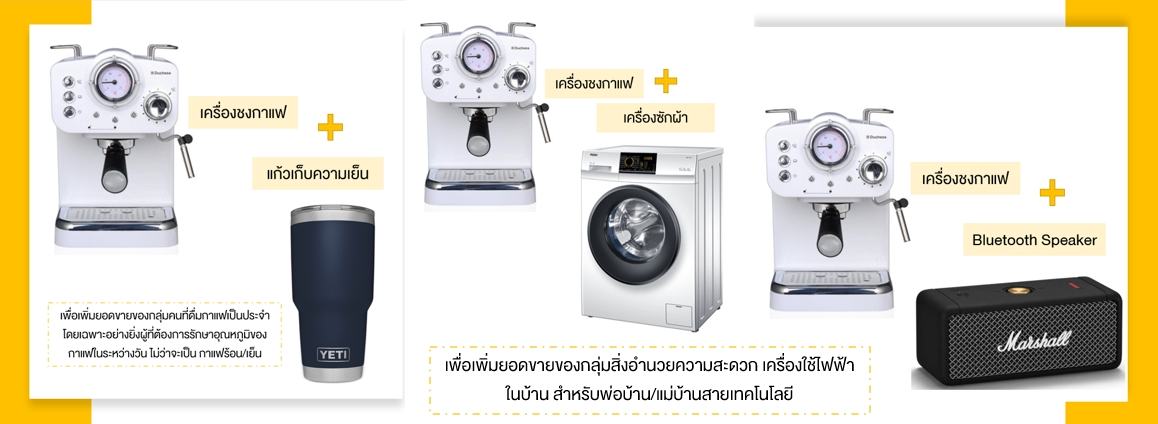
